# Assignment 2
### Understanding Uncertainty - Emily Garman
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item to the state would be defined as the item with the greatest difference between the price that the state pays for the bottle and the price at which the bottle is sold multiplied by the number of bottles of that item that were sold. That is, max((state bottle retail - state bottle cost) * bottles sold). This formula works because the price at which the bottle is sold to customers is always higher than the price that the state paid, and we have to take into account how many of these one-time profits that state is making by mutliplying the difference by the number of bottles that were sold.

In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('iowa.csv')
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [ ]:
df['profit per bottle'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['transaction profit'] = df['profit per bottle'] * df['Bottles Sold']

profit_by_item = (
    df.groupby('Item Description')['transaction profit']
    .sum()
    .sort_values(ascending=False)
)

# top ten most profitable items
profit_by_item.head(10)

Item Description
TITOS HANDMADE VODKA               364074.35
BLACK VELVET                       274676.85
FIREBALL CINNAMON WHISKEY          187535.22
CROWN ROYAL                        160981.95
CROWN ROYAL REGAL APPLE            122880.40
CAPTAIN MORGAN SPICED RUM          121115.30
HAWKEYE VODKA                      116375.04
CAPTAIN MORGAN ORIGINAL SPICED     112146.71
JACK DANIELS OLD #7 BLACK LABEL    111509.09
HENNESSY VS                        108459.45
Name: transaction profit, dtype: float64

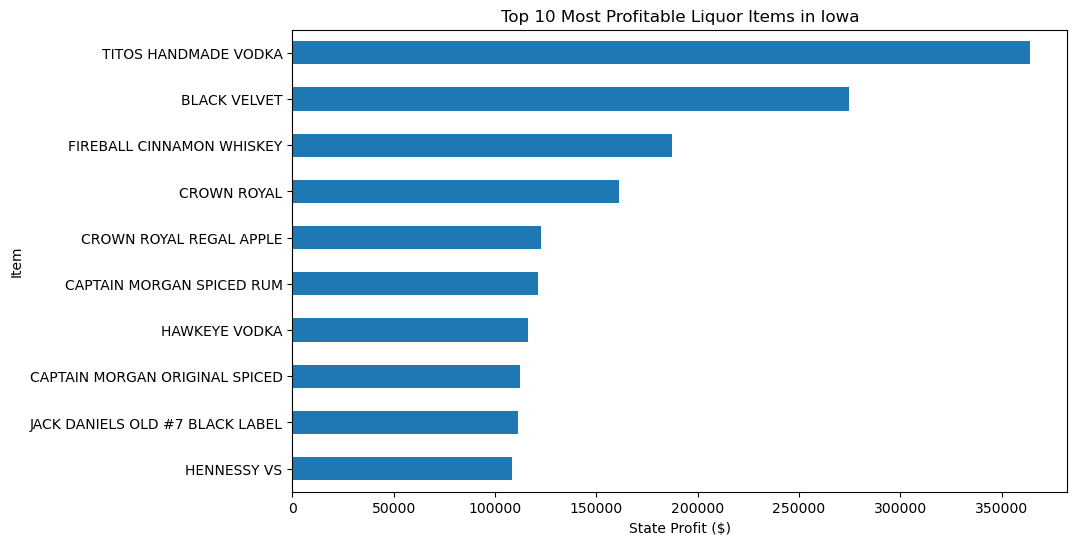

In [8]:
plot = profit_by_item.head(10).plot(
    kind='barh', figsize=(10,6), legend=False
    )
plot.set_xlabel('State Profit ($)')
plot.set_ylabel('Item')
plot.set_title('Top 10 Most Profitable Liquor Items in Iowa')
plot.invert_yaxis()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [9]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [10]:
q2a = x - y
q2a

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When I subtract the two vectors, a ValueError is returned because the vectors do not have the same shapes.

In [13]:
q2b = x.reshape(-1,1)-y.reshape(1,-1)
q2b

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

With this notaiton, a 3x2 matrix is returned by performing subtraction like this: [[x1-y1, x1-y2], [x2-y1, x2-y2], [x3-y1, x3-y2]].

In [14]:
q2c = x.reshape(1,-1)-y.reshape(-1,1)
q2c

array([[-1,  1,  3],
       [-4, -2,  0]])

This notation with the negative 1s flipped transposes the matrix produced by the previous notation, resulting in a 2x3 matrix calculated by doing the following operations: [[x1-y1, x2-y1, x3-y1], [x1-y2, x2-y2, x3-y2], [x1-y3, x2-y3, x3-y3]]

In [19]:
# to replicate q2b result
result2b = []
for numx in x:
    row = []
    for numy in y:
        row.append(int(numx - numy))
    result2b.append(row)

result2b = np.array(result2b)
result2b

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [20]:
# to replicate q2c result
result2c = []
for numy in y:
    row = []
    for numx in x:
        row.append(int(numx - numy))
    result2c.append(row)

result2c = np.array(result2c)
result2c

array([[-1,  1,  3],
       [-4, -2,  0]])

x.reshape(1,-1) will turn x into a row vector (1xn where n is the number of columns) while x.reshape(-1,1) will turn x into a column vector. The first of these can be useful when you are dealing with a column-shaped vector/array/matrix while the latter can be helpful when dealing with something that is row-shaped.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

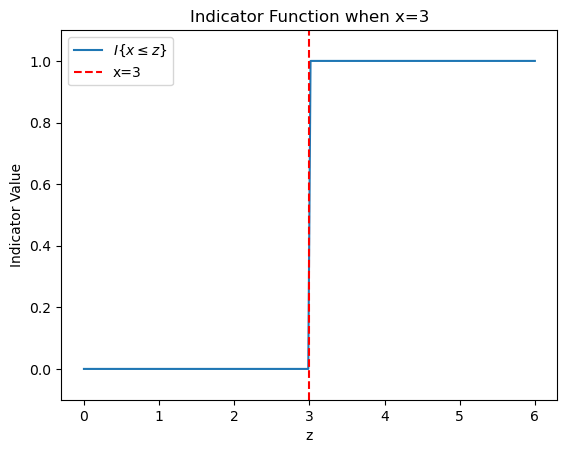

In [23]:
import matplotlib.pyplot as plt

x = 3
z = np.linspace(0,6,200)
indicator = (x <= z).astype(int)

plt.plot(z, indicator, label=r"$I\{x \leq z\}$")
plt.axvline(x, color='red', linestyle='--', label='x=3')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('Indicator Value')
plt.title('Indicator Function when x=3')
plt.legend()

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because if x<= z, then $ \mathbb{I}\{ x \le z \} = 1 $ , so $ 1- \mathbb{I}\{ x > z \} = 0 $ . If x > z, then $ \mathbb{I}\{ x \le z \} = 0 $, so $ 1- \mathbb{I}\{ x > z \} = 1 $. The two functions are complementary, so the two sides are equal for all z. Another way to think of this is visually with the step function as seen above. $ \mathbb{I}\{ x \le z \} $ turns on at z=3, and $ \mathbb{I}\{ x > z \} $ is on before z=3 and turns off when z=3. Again, these functions are the opposites of each other.

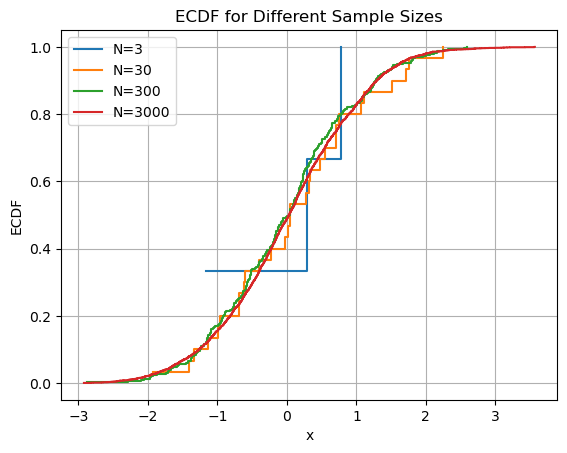

In [24]:
import numpy as np
import seaborn as sns

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    x_ecdf, y_ecdf = ecdf(X)
    plt.step(x_ecdf, y_ecdf, where='post', label=f'N={N}')

plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('ECDF for Different Sample Sizes')
plt.legend()
plt.grid(True)

As sample size N increases, the ECDF smooths and becomes a better approximate for the underlying cumulative distribution function because all of the noise from the smaller samples is cancelled out by the addition of more and more samples.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [25]:
def compute_quantile(data, q):
    data_sorted = sorted(data)
    n = len(data_sorted)

    index = (n-1)*q
    lower = int(np.floor(index))
    upper = int(np.ceil(index))
    weight = index - lower
    
    if lower == upper:
        return data_sorted[int(index)]
    else:
        return data_sorted[lower] * (1-weight) + data_sorted[upper] * weight

In [45]:
def compute_iqr_whiskers(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    return q1, q3, iqr, lower_whisker, upper_whisker

In [46]:
def summary(data):
    minimum = min(data)
    q1 = compute_quantile(data, 0.25)
    median = compute_quantile(data, 0.5)
    q3 = compute_quantile(data, 0.75)
    maximum = max(data)

    _, _, IQR, lower_whisker, upper_whisker = compute_iqr_whiskers(data)

    return {
        "min": minimum,
        "Q1": q1,
        "median": median,
        "Q3": q3,
        "max": maximum,
        "lower_whisker": lower_whisker,
        "upper_whisker": upper_whisker
    }

In [48]:
def is_outlier(data):
    _, _, _, lower_whisker, upper_whisker = compute_iqr_whiskers(data)
    return [(x < lower_whisker) or (x > upper_whisker) for x in data]

In [49]:
test = df['Bottles Sold'].dropna().tolist()

summary_result = summary(test)
summary_result

{'min': -60,
 'Q1': 3.0,
 'median': 6.0,
 'Q3': 12.0,
 'max': 2400,
 'lower_whisker': -10.5,
 'upper_whisker': 25.5}

In [50]:
outliers = is_outlier(test)
sum(outliers)

7651

Text(0.5, 1.0, 'Boxplot of Bottles Sold (for comparison)')

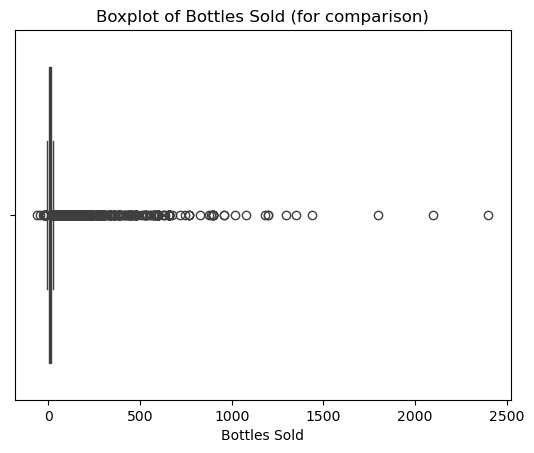

In [44]:
sns.boxplot(x=df['Bottles Sold'])
plt.title('Boxplot of Bottles Sold (for comparison)')

In [43]:
df['Bottles Sold'].describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

My functions produced outputs very similar to the boxplot ans seaborn functions.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [65]:
def gaussian_kernel(u):
    return 1/np.sqrt(2*np.pi) * np.exp(-0.5 * u**2)

def epanechnikov_kernel(u):
    return 0.75 * (1 - u**2) * (abs(u) <= 1)

def uniform_kernel(u):
    return 0.5 * (abs(u) <= 1)

def triangular_kernel(u):
    return (1 - abs(u)) * (abs(u) <= 1)


def compute_kde(x, z, h, kernel='gaussian'):
    n = len(x)

    if kernel == 'gaussian':
        k = gaussian_kernel
    elif kernel == 'epanechnikov':
        k = epanechnikov_kernel
    elif kernel == 'uniform':
        k = uniform_kernel
    elif kernel == 'triangular':
        k = triangular_kernel
    else:
        raise ValueError('Kernel not recognized')
    
    f = np.zeros_like(z, dtype=float)
    for xi in x:
        f += k((z - xi) / h)
    f /= (n * h)

    return f

def plot_kde(x, h, kernels=['gaussian','epanechnikov','uniform','triangular']):
    z = np.linspace(min(x)-1, max(x)+1, 500)

    plt.figure(figsize=(10,6))
    for kernel in kernels:
        f = compute_kde(x,z,h,kernel)
        plt.plot(z,f,label=f'{kernel}, h={h}')

    plt.title('Kernel Density Estimates')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.xlim(0,75)
    plt.legend

In [53]:
def compute_bandwidth(x):
    sigma = np.std(x, ddof=1)
    n = len(x)
    return 1.06 * sigma * n**(-1/5)

In [54]:
# testing on iowa liqor sales bottles sold data
x = df['Bottles Sold'].dropna().values

h_plug = compute_bandwidth(x)
h_plug

np.float64(2.706155983675848)

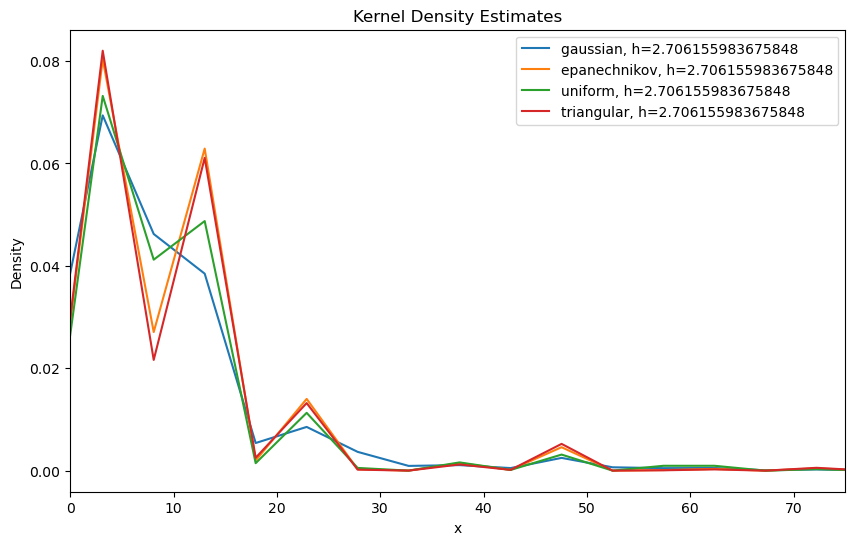

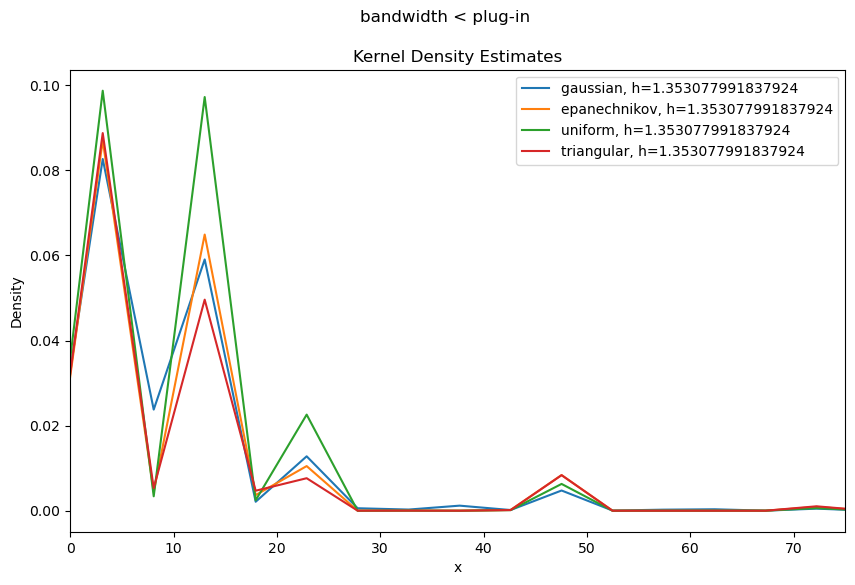

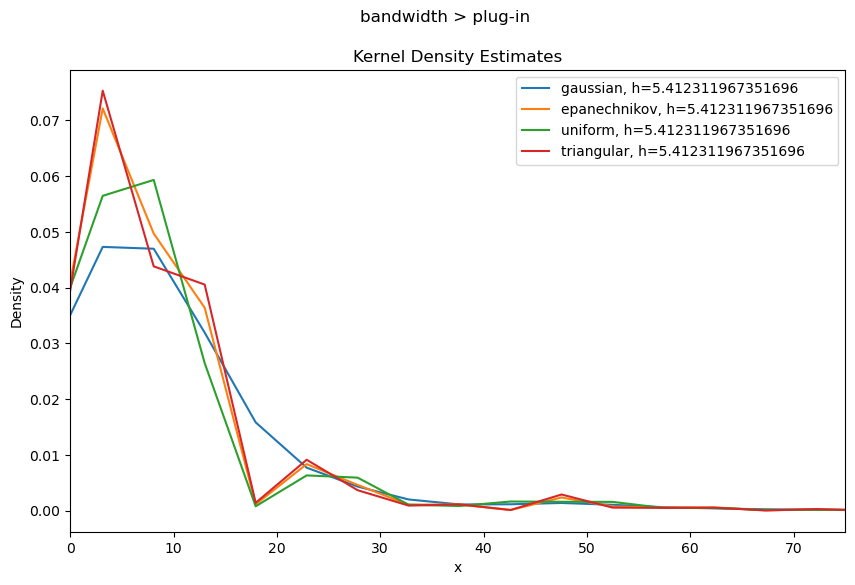

In [ ]:
plot_kde(x, h_plug)
plt.legend()
plot_kde(x, h_plug/2) # smaller bandwidth
plt.suptitle('bandwidth < plug-in')
plt.legend()
plot_kde(x, h_plug*2) # larger bandwidth
plt.suptitle('bandwidth > plug-in')
plt.legend()

As can be seen by comparing the above graphs, when the bandwidth is less than the plug-in (the 2nd plot), the KDE is jagged and overfits to the data because it takes every datapoint into account, giving the function its spiking appearance. When the bandwidth is greater than the plug-in (the 3rd plot), the KDE is smoother, showing a more gradual decline in density as x increases. This underfits the data, and may miss some important spikes in the data. This means that the plug-in bandwidth is usually the best estimate for the KDE, as it is a baance of sensitivity and smoothness.